# Data Inspection

In this book, we'll be exploring the [NYC real estate dataset](https://www.kaggle.com/new-york-city/nyc-property-sales) provided by the City of New York and sourced from Kaggle. 

<img src="https://media.giphy.com/media/csxOkD7hISGWE0vQra/giphy.gif"/>

The dataset includes properties that were sold between September 2016 and September 2017. Each row represents the sale of a property, while the columns are features that describe the property. Here is a list of the columns:

- Borough
- Neighborhood 
- Building class category 
- Tax class at present
- Block
- Lot 
- Ease-ment 
- Building class at present 
- Address
- Apartment number 
- Zip code 
- Residential units
- Commercial units 
- Total units 
- Land square feet
- Gross square feet 
- Year built 
- Tax class at time of sale 
- Building class at time of sale 
- Sale price 
- Sale date

For the official definitions of each of these columns, refer to the [Data Defintions](AP_nyc_data_definitions.md) in the Appendix. 

## 1) Loading in the data

Before we get started, the very first thing we need to do is import the `pandas` package into our environment so that it's readily available. Let's give it the alias of "pd" so that we don't have to write out "pandas" every time we call a function.

In [1]:
import pandas as pd

In order to explore the NYC real estate dataset, we need to load it into our environment. We can do this using the Pandas [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function. Let's call our new dataframe `"df"` (short for dataframe).

In [2]:
df = pd.read_csv("data/nyc_real_estate.csv")

In [3]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

## 2) Checking the shape and size of our dataset 

As a data scientist, one of the first things we want to know about a dataset is how big it is. How many rows and columns are we dealing with? Let's figure out the "shape" of our dataframe:

In [4]:
df.shape

(84548, 21)

`df.shape` returns the number of rows and number of columns of a dataframe:

```
(n_rows, n_columns)
```

Our dataset has ~84.5K rows, which means that we have data on ~84.5K property sales in NYC.

### Number of rows

The length of a dataset represents the number of rows so if you're only interested in knowing how many rows we're dealing with, you can simply apply the `len()` function:

In [5]:
len(df)

84548

You can also get the number of rows from `df.shape` by accessing the first element of the `df.shape`'s output:

In [6]:
df.shape[0]

84548

### Number of columns

To get the number of columns of a dataset, you can first get the list of a dataset's columns:

In [7]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

Then, get the length of the column list:

In [8]:
len(df.columns)

21

Alternatively, you can also get the number of columns by getting the second element of `df.shape`'s output:

In [9]:
df.shape[1]

21

### Size

What if we want to how many data points ("cells") are in the dataset? This is considered the **size** of a dataframe. 

$\text{number of data points} = \text{size} = \text{n_rows} \times \text{n_cols}$

You can get a dataframe's size using `.size`.

In [10]:
df.size

1775508

There are 1,775,508 data points in our dataset! 

Let's check that `df.size` equal `n_rows` * `n_cols`:

In [11]:
df.size == df.shape[0] * df.shape[1]

True

```{note}
Since Pandas stores data in-memory, it is not optimized to work with very large datasets. The maximum amount of data that Pandas can handle depends on 2 things:

- The type of data you’re working with (e.g., integers and floats are more space-efficient than strings)
- RAM of your machine. The larger the memory, the more data you’ll be able to work with. 

If your dataset is too big for Pandas to handle, you’ll get a `MemoryError`. There are several ways to get around this problem, as described in the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/scale.html#use-other-libraries), including splitting the dataset into smaller chunks or using [Dask](https://dask.org/), a parallel computing library instead. 
```

## 3) Viewing the data



Now, let's take a peek at our data to get a sense of what it looks like 👀. There are 3 Pandas methods that you can use to inspect data:

1. `.head()`: viewing first x rows 
2. `.tail()`: viewing last x rows 
3. `.sample()`: viewing random x rows 

If you don't mind viewing a lot of data at once, you can simply print `df` which will return the first 5 rows and last 5 rows of the dataframe.

### First $n$ rows

By default, `df.head()` returns the first 5 rows but you can customize this by defining `n` rows that you want to return inside of the parentheses. For example, `df.head(n=3)` would return 3 rows and `df.head(n=7)` would return 7 rows. 

In [12]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


### Last $n$ rows

`df.tail()` does the opposite of `df.head()` - it returns the last 5 rows of a dataframe rather than the first 5. Similarly, you can specify how many rows you want to return by passing in the number inside the parentheses:

In [13]:
df.tail(n=2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


```{note}
`df.tail(2)` and `df.tail(n=2)` return the same thing. The latter is more explicit which can be easier for other people reading your code to understand.
```

### Sampling $n$ rows

If you need to randomly sample rows from your dataframe, you can use `df.sample()`. Unlike `df.head()` and `df.tail()`, `df.sample()` will return 1 row by default instead of 5. 

In [14]:
df.sample()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
19932,2,CROTONA PARK,07 RENTALS - WALKUP APARTMENTS,2A,2952,28,,C3,1790 PROSPECT AVENUE,,...,4,0,4,1760,4620,1908,2,C3,422573,2016-09-27 00:00:00


## 4) Assessing missing values

The fastest way to assess missing values of a given dataset is to use `df.info()`. It gives a good overview of the columns, datatypes, and "non-null count" (a crpytic way of describing how many values are not missing).

Let's test it out on our dataset.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

At the very bottom of the output, we see:

```
dtypes: int64(9), object(12)
```

There are 9 columns that `int64`, which store integer (numerical) values. There are 12 columns that are "objects" which typically describes columns storing string values.

There are 84,548 rows and across all 21 columns, there are 84,548 non-null values which indicates that we don't have any missing values in our dataset. 🎉

### Using `.isnull()` and `.notnull()`

You can use [`.isnul()`](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html) to generate a boolean mask that returns `True` when the value is missing and `False` when it is not.

```{note}
To reverse the boolean mask, you can use [`df.notnull()`](https://pandas.pydata.org/docs/reference/api/pandas.notnull.html) which returns True when the value is not null (i.e., not missing).
```

Let's try it out on our dataframe:

In [16]:
df.isnull().head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


We can count the number of missing values in each column like this:

In [17]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

As expected, there are 0 missing values in our dataset. 👍

### Using the missingno package

Another way to visualize missing values in your dataset is to use the [missingno](https://github.com/ResidentMario/missingno) package. It's a great way to assess which rows have missing values and how sparse or dense your dataset is. Let's import it and give it the alias "msno".

In [18]:
import missingno as msno

Let's use the matrix() function to visualize patterns of missing values in our dataset:

<AxesSubplot:>

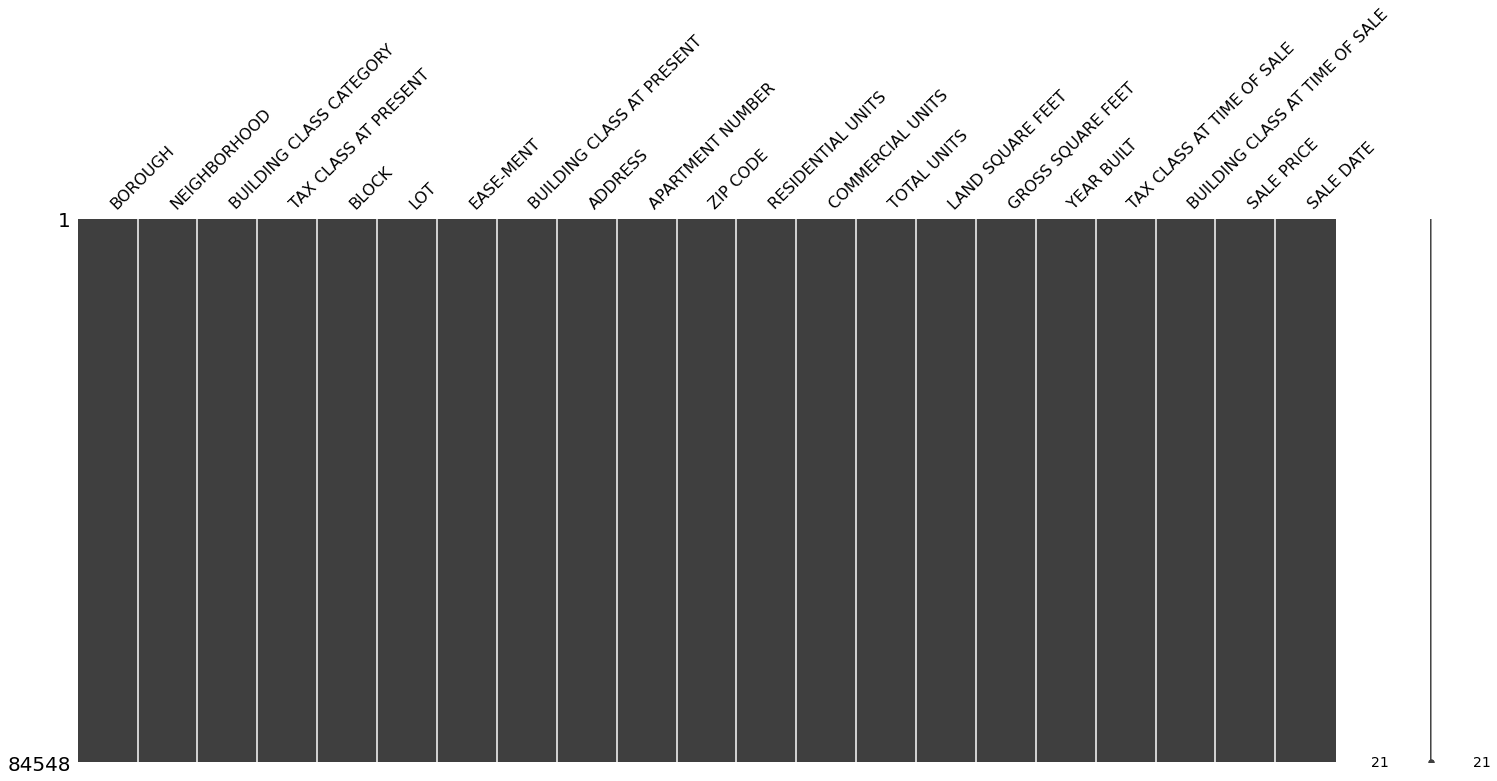

In [19]:
msno.matrix(df)

From the plot above, we can see that our data is very dense. There are no missing values. For examples of what the matrix would look like with missing data, check out the [missingno docs](https://github.com/ResidentMario/missingno#matrix). 